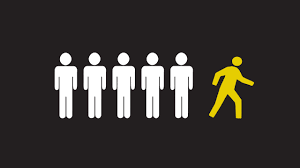

- Bank customer churn refers to the phenomenon where **customers discontinue their relationship with a bank.** It’s a key metric for banks to track because it indicates customer retention levels and the effectiveness of customer satisfaction efforts.

- If a significant number of customers are leaving, it can hurt the **bank's profitability and market position.**

In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

## Objective of Analysis:

**Key Factors:** Identify key factors influencing churn

**Customer Retention Strategies:** Based on the insights, suggest targeted strategies to reduce churn

The dataset can be found at : https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling

## Data Dictionary 

| Variable | Description |
| --- | --- |
| RowNumber | Row number in the dataset | 
| CustomerId | Unique identifier for each customer | 
| Surname | Last Name of customer | 
| CreditScore | Customer Credit Score | 
| Geography | Customer’s country of residence | 
| Gender | Customer Gender | 
| Age | Customer Age | 
| Tenure |  Number of years the customer has been with the bank | 
| Balance | Customer Account Balance | 
| NumOfProducts | Number of bank products the customer uses/has used | 
| HasCrCard | Whether the customer has a credit card (1 for yes, 0 for no) | 
| IsActiveMember | Whether the customer is an active member in the bank ( 1 for yes , 0 for no ) | 
| EstimatedSalary | Estimated salary of the customer | 
| Exited | Whether the customer has churn or not  | 

In [310]:
df = pd.read_csv("Churn_Modelling.csv")

In [311]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [312]:
# Let's drop RowNumber , CustomerId and Surname because they provide no predictive power in determining churn
df.drop(columns = ["RowNumber" , "CustomerId" , "Surname"] , axis = 1 , inplace = True)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


- There is only 2 categorical columns and the rest are numerical columns. So , we have to handle the categorical variables

In [314]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [315]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- Fortunately , for us there is no null values

In [316]:
print(df['Gender'].unique())
print(df['Geography'].unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


In [317]:
# Let's convert the Gender column to a numerical column first 
from sklearn.preprocessing import LabelEncoder 

# Label encoding Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [318]:
sorted_unique_ages = sorted(df["Age"].unique().tolist())

print(sorted_unique_ages)

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 92]


In [319]:
# Defining bins and labels
bins = [17, 24, 34, 44, 54, 64, 100]  # Adding a high end for the last bin
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create the bins and assign them to the DataFrame
df['Age_Bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df.drop(["Age"] , axis = 1 , inplace = True)

# Verify the new column
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Bin
0,619,France,0,2,0.00,1,1,1,101348.88,1,35-44
1,608,Spain,0,1,83807.86,1,0,1,112542.58,0,35-44
2,502,France,0,8,159660.80,3,1,0,113931.57,1,35-44
3,699,France,0,1,0.00,2,0,0,93826.63,0,35-44
4,850,Spain,0,2,125510.82,1,1,1,79084.10,0,35-44


## Exploratory Data Analysis (EDA)

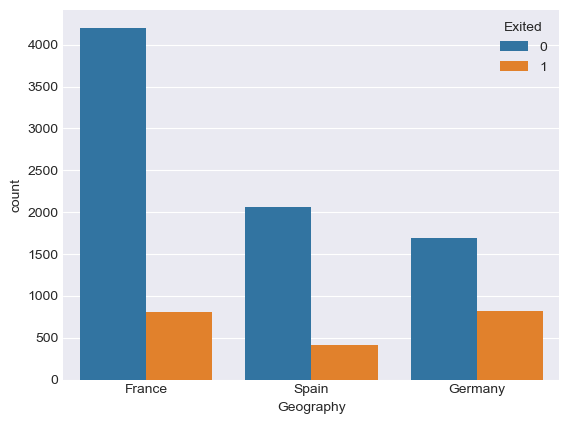

In [320]:
sns.countplot(x='Geography', hue = "Exited" , data=df)
plt.show()


- Most of the customers are from France
- Germany and France has somewhat of a same level of churn. Spain is lower than both of them 
- A lot of customers has not churn which could be of a good news? Let's do more analysis 

Text(0.5, 1.0, 'Churn Rate by Gender')

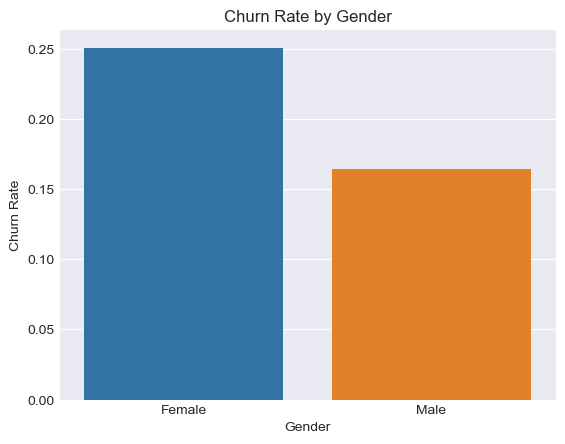

In [321]:
# Churn rate by gender
churn_rate_gender = df.groupby('Gender')['Exited'].mean().reset_index()
sns.barplot(x = "Gender" , y = "Exited" , data = churn_rate_gender)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')

- Female has more churning rate

In [322]:
df.head(1)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Bin
0,619,France,0,2,0.0,1,1,1,101348.88,1,35-44


<Axes: xlabel='IsActiveMember', ylabel='count'>

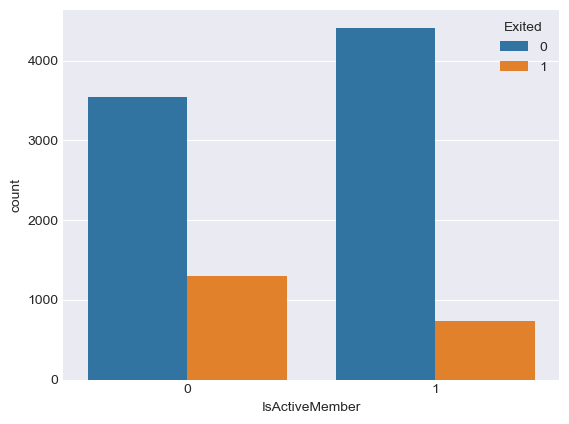

In [323]:
sns.countplot(x = "IsActiveMember" , hue = "Exited" , data = df )

- Active members did not churn as much as inactive members. My hypothesis is that , inactive members could have possible found better products/services from other banks

<Axes: xlabel='Age_Bin', ylabel='Count'>

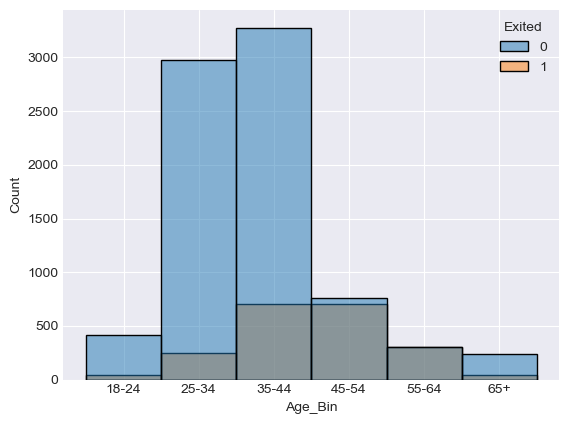

In [324]:
sns.histplot(x = "Age_Bin" , hue = "Exited" , data = df)

- Most churning happen at age 45-54 and 55-64
- Most customers are from 25-34 and 35-44
- Now let's do ordinal encoding for the age column

In [325]:
# Define ordinal mapping
ordinal_mapping = {label: index for index, label in enumerate(labels)}

# Apply ordinal encoding
df['Age_Bin'] = df['Age_Bin'].map(ordinal_mapping)

In [326]:
# Let's also do One-Hot encoding for Geography column 

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Bin,Geography_Germany,Geography_Spain
0,619,0,2,0.00,1,1,1,101348.88,1,2,False,False
1,608,0,1,83807.86,1,0,1,112542.58,0,2,False,True
2,502,0,8,159660.80,3,1,0,113931.57,1,2,False,False
3,699,0,1,0.00,2,0,0,93826.63,0,2,False,False
4,850,0,2,125510.82,1,1,1,79084.10,0,2,False,True


## SO FAR
- There is a lot of customers that did not churn compared to churn. 
- We must investigate the distribution of Exited column to understand this scenario 

Text(0.5, 1.0, 'Distribution of Customer Churn Column')

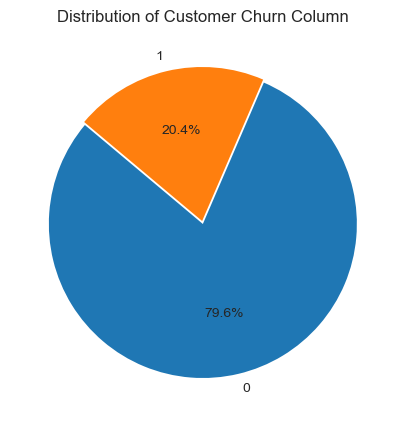

In [327]:
# Let's check out the distribution of customer churning
churn_count = df["Exited"].value_counts()

explode = [0.01] * len(churn_count)

plt.figure(figsize=(8, 5))
plt.pie(churn_count , labels=churn_count.index, autopct='%1.1f%%', explode = explode, startangle=140)
plt.title('Distribution of Customer Churn Column')


- This Dataset is **highly imbalanced** so we have to handle it. Nearly 80% customers has not churn and 20% customers has churn. This we cause the models to be biased so we have to handle this.

### Handling imbalanced data using SMOTE

- SMOTE increases the number of samples in the minority class by creating synthetic examples rather than by over-sampling with replacement

In [328]:
from imblearn.over_sampling import SMOTE

X = df.drop('Exited', axis=1)
y = df['Exited']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['Exited'] = y_res

In [329]:
df_resampled.isnull().sum()

CreditScore             0
Gender                  0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Age_Bin              4266
Geography_Germany       0
Geography_Spain         0
Exited                  0
dtype: int64

In [330]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='most_frequent')  

# Fit and transform the imputer on the dataset
df_resampled['Age_Bin'] = imputer.fit_transform(df_resampled[['Age_Bin']])

Text(0.5, 1.0, 'Distribution of Customer Churn Column')

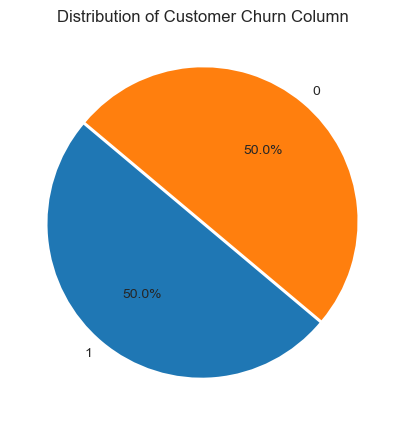

In [331]:
churn_count = df_resampled["Exited"].value_counts()

explode = [0.01] * len(churn_count)

plt.figure(figsize=(8, 5))
plt.pie(churn_count , labels=churn_count.index, autopct='%1.1f%%', explode = explode, startangle=140)
plt.title('Distribution of Customer Churn Column')

- Perfectly balanced dataset

#### Correlation Matrix

<Axes: >

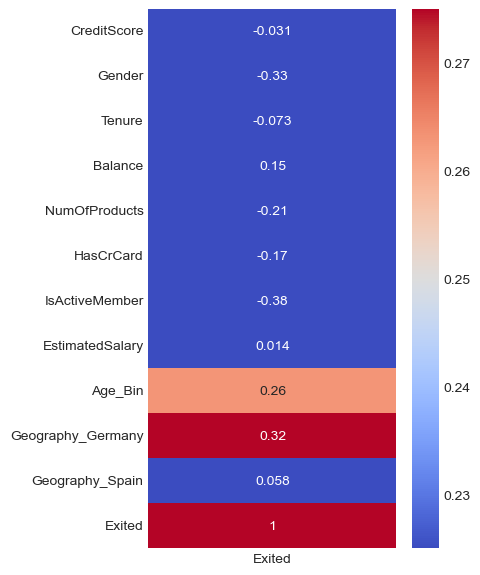

In [332]:
corr_matrix = df_resampled.corr()

plt.subplots(figsize = (4,7))
sns.heatmap(corr_matrix[["Exited"]] , cmap = "coolwarm" , annot = True , vmax = 0.25, vmin = 0.25)

There quite of a strong relation for Age , Geography and Balance

### Splitting the Dataset into Training and Test Sets

In [333]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X = df_resampled.drop('Exited', axis=1)  # Features
y = df_resampled['Exited']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training features shape: (12740, 11)
Testing features shape: (3186, 11)
Training target shape: (12740,)
Testing target shape: (3186,)


In [334]:
# Converting it back to a dataframe because it is easier to work with the column names for the scaled features
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

## Model Training 

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , make_scorer

models = {
    'Logistic Regression': LogisticRegression(),
    'K-nearest Neighbours' : KNeighborsClassifier(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier()
}


# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision' : [],
    'F1 Score': []
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['F1 Score'].append(f1)
    
# Creating a Dataframe for metrics
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,F1 Score
0,Logistic Regression,0.782172,0.773393,0.777849
1,K-nearest Neighbours,0.822034,0.802826,0.821754
2,Decision Tree Classifier,0.809165,0.790769,0.808685
3,Random Forest Classifier,0.865035,0.855605,0.862708
4,Gradient Boosting Classifier,0.848713,0.843049,0.845215


C:\Users\User\AppData\Local\Temp\ipykernel_18644\2422197181.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


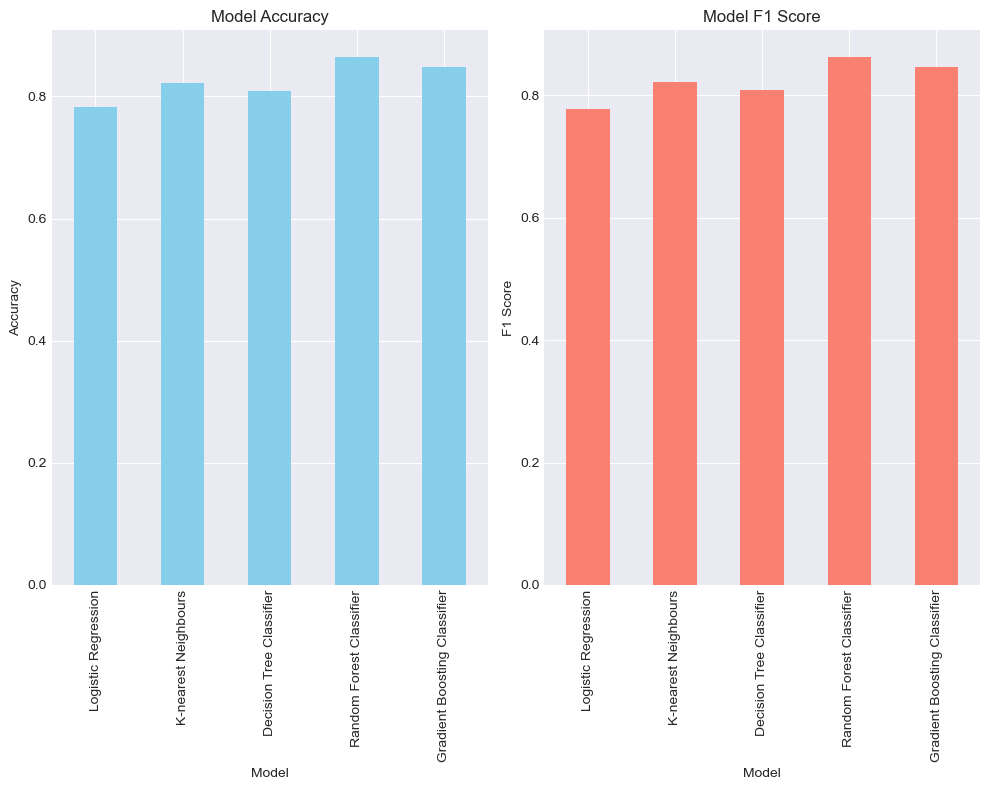

In [336]:
# Let's plot the accuracies and F1-score to determine the best model to perform customer churn 
plt.style.use('seaborn-darkgrid')

fig , ax = plt.subplots(1,2,figsize = (10,8))

# Plot Accuracy
metrics_df.plot(x='Model', y='Accuracy', kind='bar', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Model')

# Plot F1 Score
metrics_df.plot(x='Model', y='F1 Score', kind='bar', ax=ax[1], color='salmon', legend=False)
ax[1].set_title('Model F1 Score')
ax[1].set_ylabel('F1 Score')
ax[1].set_xlabel('Model')

plt.tight_layout()

- As we can see , the Random Forest Classifier performs the best in Accuracy , Precision and even F1 score with all scores reaching over 85% scores respectively

### Random Classifier important attributes

Text(0.5, 1.0, 'Feature Importances for Random Forest Classifier')

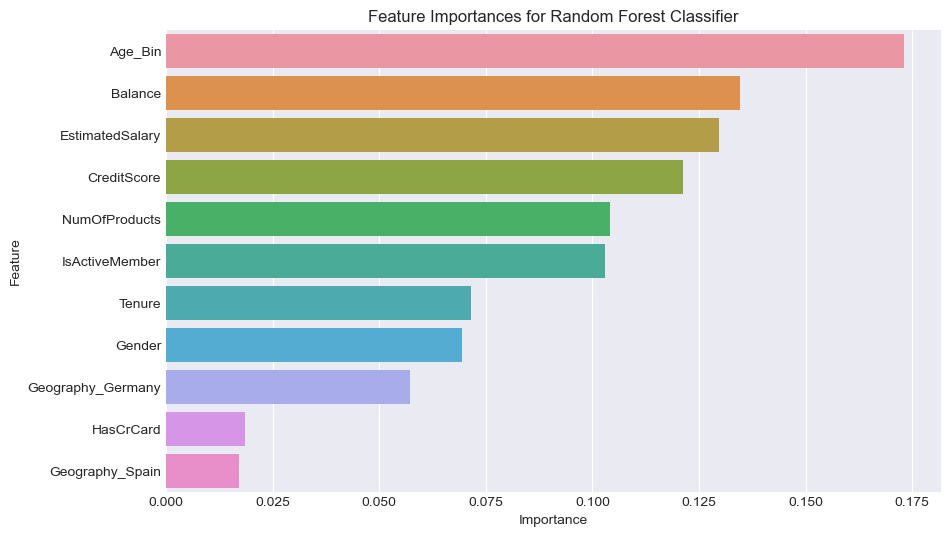

In [338]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled , y_train)
y_pred = rf.predict(X_test_scaled)

features = X_res.columns
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances for Random Forest Classifier')

- Age, Balance and Estimated Salary are the top 3 features that banks should focus on to prevent their customers from churning

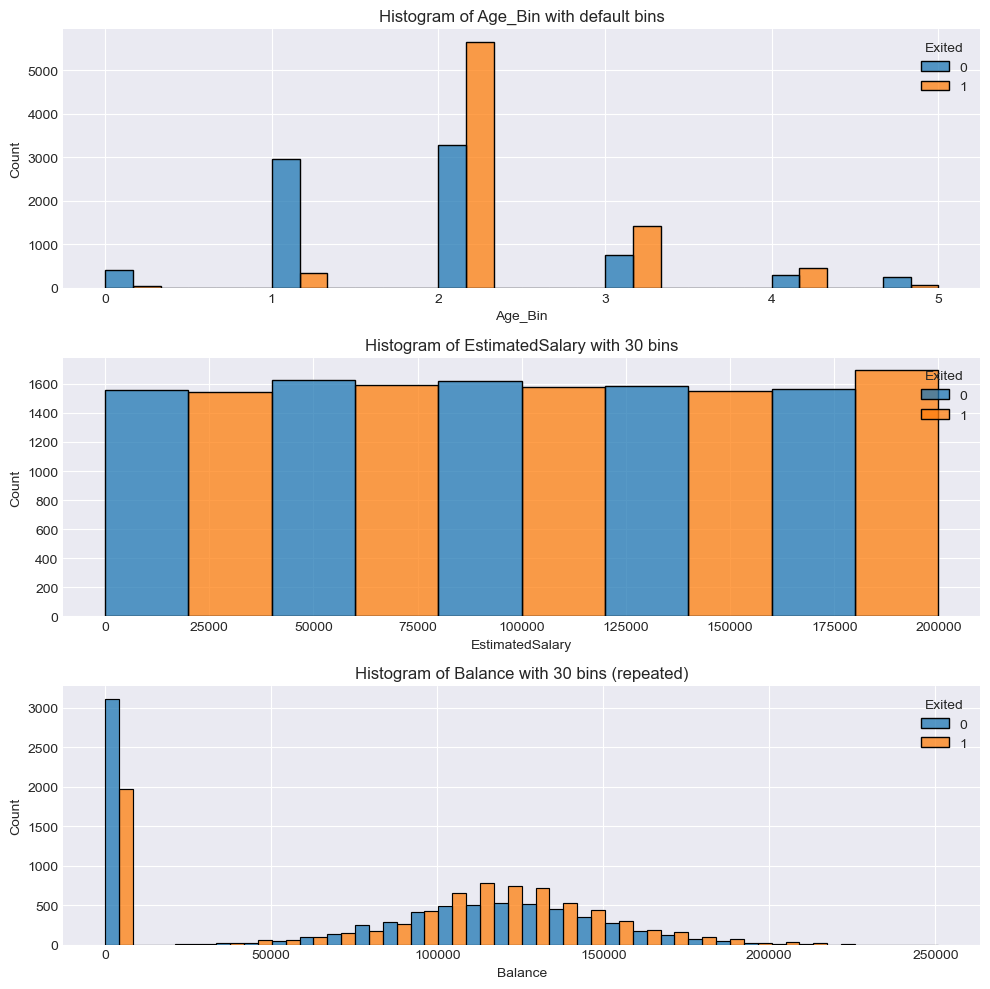

In [354]:
# Create subplots with 3 rows and 1 column
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Plot histograms with different bins and the same data
sns.histplot(x="Age_Bin", hue="Exited", multiple="dodge", ax=ax[0], data=df_resampled)
ax[0].set_title('Histogram of Age_Bin with default bins')

sns.histplot(x="EstimatedSalary", bins=5, hue="Exited", multiple="dodge", ax=ax[1], data=df_resampled)
ax[1].set_title('Histogram of EstimatedSalary with 30 bins')

sns.histplot(x="Balance", bins=30, hue="Exited", multiple="dodge", ax=ax[2], data=df_resampled)
ax[2].set_title('Histogram of Balance with 30 bins (repeated)')

# Adjust the layout
plt.tight_layout()

## Conclusion:
- Age, Balance and Estimated Salary are the top 3 features
- Ages 35-44 customers churn the most 
- Customers with really high estimate salaries , churn the most
- The higher the customer's bank balance , more churning occurs 

## My Hypothesis / Strategy for the insights gathered

1. Ages 35-44 Customers Churn the Most:

**Possible Reasons**:

- This age group might be more financially mobile, looking for better banking services or interest rates.

- They could be facing major life events (e.g., buying a house, paying for children's education) that impact their banking needs.

**Strategy**:

- Offer competitive loan rates, mortgage services, and financial planning tools tailored to this age group.

- Implement a loyalty program that rewards long-term customers with benefits that grow over time.

2. Customers with High Estimated Salaries Churn the Most:

**Possible Reasons**:

- High-income customers might have higher expectations for premium services and benefits.
- They might also be more likely to switch banks for better investment opportunities or higher interest rates.

**Strategy**:

- Develop premium banking packages with exclusive perks such as personalized financial advisory services, higher interest rates on savings accounts, and investment opportunities.

- Conduct regular satisfaction surveys and focus groups to understand and address the specific needs of high-income customers.

3. The Higher the Customer's Bank Balance, More Churning Occurs:

**Possible Reasons**:

- Customers with high balances might seek better investment options, interest rates, or banking services.
- They might also be more sensitive to service fees or transaction costs.

**Strategy**:

- Offer competitive interest rates for high-balance accounts and low-fee or fee-free banking options.
- Provide exclusive services such as wealth management, investment advice, and personalized financial planning for high-balance customers.